# Cars 4 You: Expediting Car Evaluations with Machine Learning

## Problem Statement

**Cars 4 You** is an online car resale company that buys vehicles from different brands through its platform.  
Users submit details about their cars, which are then sent for mechanic evaluation before resale.

Due to rapid growth, the company faces **delays in car inspections**, leading to loss of potential customers.  
To solve this, the company wants a **predictive model** capable of estimating the **price of a car based on user-provided inputs**, without needing a physical evaluation.

## Project Objectives

The overall project is structured into three main goals (for the final submission), but the **first deliverable** focuses on the **initial stages** of this workflow.

### 1. Regression Benchmarking
Develop a regression model that predicts car prices (`price`) using the 2020 Cars 4 You dataset.  
Implement a consistent **model assessment strategy** to compare models and select the most generalizable one.

### 2. Model Optimization
Later in the project, explore model optimization through:
- Hyperparameter tuning  
- Feature engineering and preprocessing adjustments  

Compare and discuss the performance improvements.

### 3. Additional Insights
Open-ended exploration for the final project phase (e.g., feature importance, ablation study, specialized models, deep learning).



## Dataset Description

You have access to two datasets:

- **Training Set:** Cars from the 2020 Cars 4 You database, including prices (`price`).
- **Test Set:** Same descriptive features but without prices — used for Kaggle submission.

### Variables

| Attribute | Description |
|------------|-------------|
| **carID** | Unique identifier for each car |
| **Brand** | Car brand (e.g., Ford, Toyota) |
| **model** | Car model |
| **year** | Year of registration |
| **mileage** | Distance travelled (in miles) |
| **tax** | Road tax applicable in 2020 (in £) |
| **fuelType** | Fuel type (Diesel, Petrol, Hybrid, Electric) |
| **mpg** | Miles per gallon |
| **engineSize** | Engine size in liters |
| **paintQuality%** | Mechanic’s paint and hull assessment |
| **previousOwners** | Number of previous owners |
| **hasDamage** | Boolean (True/False) — damaged or not |
| **price** | Target variable — purchase price (£) |



## FIRST DELIVERABLE — Task Overview

This initial assignment is a **preparatory milestone** for your final project.  
You will **explore, prepare, and model** the dataset to demonstrate an understanding of the full ML pipeline.

Your submission must include:

1. A **Jupyter Notebook** (or a ZIP of notebooks) with code and explanatory Markdown cells.
2. A **2-page PDF** describing your pipeline’s structure and rationale.

### Naming Convention
Homework_Group36 



## DELIVERABLE TASKS & POINT DISTRIBUTION

### 1. Data Import & Exploration — *3 points*
- Load and inspect the dataset contents.  
- Generate **descriptive statistics**.  
- Detect and describe **inconsistencies or anomalies**.  
- Perform **visual exploration** (univariate & multivariate).  
- Extract **insights** and explain your findings.


### 2. Data Cleaning & Preprocessing — *5 points*
- Identify and **handle missing values** appropriately.  
- Detect and manage **outliers**, justifying your choices.  
- Encode **categorical variables**.  
- Evaluate existing features and, if relevant, **create new ones** with explanations.  
- Apply **data scaling/normalization**, explaining why your approach fits the problem.


### 3. Feature Selection — *3 points*
- Define a **clear feature selection strategy**.  
- Use **course-approved methods** (e.g., correlation, recursive elimination, model-based).  
- Present and justify your **final feature set**.


### 4. Model Building & Performance Assessment — *4 points*
- Identify the **problem type** (regression).  
- Choose relevant **algorithms** (linear models, tree-based, etc.).  
- Define one **model assessment strategy** (e.g., holdout, k-fold cross-validation).  
- Justify the **evaluation metrics** (e.g., RMSE, MAE, R²).  
- Train **at least one model** and generate **predictions for the test set**.

💡 **Bonus:** +1 point if your team ranks in the **Top 5 on Kaggle**.



### 5. Pipeline Structure & Documentation (PDF) — *5 points*
- Provide a **schematic of your full pipeline**:
  - Data cleaning  
  - Feature preprocessing  
  - Feature selection  
  - Model training and evaluation  
- Include concise explanations of:
  - What is done  
  - To which variables  
  - Why each step is taken
- Maintain **clarity, structure, and readability** throughout.


### Total Scoring
| Component | Points |
|------------|---------|
| Data Exploration | 3 |
| Preprocessing | 5 |
| Feature Selection | 3 |
| Model Building | 4 |
| Pipeline Documentation | 5 |
| **Total** | **20 points** |
| **Bonus (Top 5 Kaggle)** | **+1** |
| **Final Grade = min(20, your points)** |  |


## Completion Checklist

| Task | Done? |
|------|-------|
| Dataset imported and explored | ☐ |
| Missing values handled | ☐ |
| Outliers addressed | ☐ |
| Categorical variables encoded | ☐ |
| Features scaled and/or engineered | ☐ |
| Feature selection strategy implemented | ☐ |
| Regression model trained | ☐ |
| Performance metrics explained | ☐ |
| Predictions generated for test set | ☐ |
| Pipeline described in PDF | ☐ |
| Kaggle submission tested | ☐ |
| Notebook clean, commented, and executable | ☐ |


# 1. Importing libraries & Data

In [1]:
# general imports that we will need
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#preprocessing of datasets
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures

#from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# enable IterativeImputer (MICE)
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer


# Linear regression model and evaluation metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# filter methods
# - spearman 
# - chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Custom functions and variables
from functions import histogram_boxplot, labeled_barplot, stacked_barplot, distribution_plot_wrt_target 
from vocab_prep import BRAND_MODEL_VOCAB

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)
pd.set_option('display.max_rows', 500)

#### Data Loading

In [2]:
# this loads the train data 
train_raw = pd.read_csv('project_data/train.csv')

# this loads the test data
test_raw = pd.read_csv('project_data/test.csv')

#print first five rows of the training data
train_raw.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


#### Verify that carID can be used as index

In [3]:
train_raw['carID'].is_unique

True

In [4]:
train_raw['carID'].isna().any()

np.False_

#### Set carID as index

In [5]:
# setting carID as index
# train_raw.set_index('carID', inplace = True)

# sorting by index
# train_raw.sort_index(inplace =True)

# displaying the first three rows
# train_raw.head(3)

# 2. Exploratory Data Analysis

In [6]:
train = train_raw.copy()

In [7]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carID,75973.0,NaN,NaN,NaN,37986.0,21931.660338,0.0,18993.0,37986.0,56979.0,75972.0
Brand,74452,72,Ford,14808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,74456,735,Focus,6353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096611,2.208704,1970.0,2016.0,2017.0,2019.0,2024.121759
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,40,Manual,38050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74510.0,NaN,NaN,NaN,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.0
fuelType,74462,34,Petrol,37995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,68069.0,NaN,NaN,NaN,120.329078,65.521176,-91.12163,125.0,145.0,145.0,580.0
mpg,68047.0,NaN,NaN,NaN,55.152666,16.497837,-43.421768,46.3,54.3,62.8,470.8


In [8]:
# let's check the data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [9]:
# let's check a sample of the data
train.sample(10)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
69512,44722,Mercedes,GLC Class,2018.0,28995,Automatic,9500.0,Diesel,150.0,56.5,2.1,77.0,0.0,NaN
53000,35963,Mercedes,C Class,2017.0,13800,Automatic,50369.0,Diesel,20.0,65.7,2.1,80.0,4.0,0.0
6366,50618,Skoda,Citigo,2017.0,7000,manual,7489.0,Petrol,150.0,64.2,1.0,84.0,4.0,0.0
29021,69344,VW,Touareg,2019.0,45492,Automatic,7000.0,Diesel,145.0,34.0,3.0,62.0,0.0,0.0
10062,26815,Ford,Focus,2019.0,14698,Manual,10812.0,DIESEL,NaN,NaN,1.5,99.0,2.0,0.0
14704,3618,Audi,A1,2020.0,26450,Semi-Auto,5000.0,Petrol,145.0,44.1,1.5,89.0,2.0,0.0
6924,16234,Ford,Focus,2014.0,6770,Manual,60852.0,Petrol,30.0,56.5,1.0,37.0,3.0,0.0
50783,68932,VW,Tigua,2019.0,22798,Manual,10.0,Petrol,150.0,40.9,1.5,51.0,0.0,0.0
67071,27659,Ford,Focus,2016.0,9399,Manual,32041.0,Diesel,0.0,74.3,1.5,98.0,4.0,0.0
23348,18860,Ford,Fiesta,2016.0,8397,Manual,29500.0,Petrol,0.0,65.7,1.0,98.0,1.0,0.0


## 2.1 Inconsistencies

**Brand**

Typing errors

In [10]:
# display all unique values 
train['Brand'].unique()

array(['VW', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel', 'Mercedes',
       'FOR', 'mercedes', 'Hyundai', 'w', 'ord', 'MW', 'bmw', nan,
       'yundai', 'BM', 'Toyot', 'udi', 'Ope', 'AUDI', 'V', 'opel', 'pel',
       'For', 'pe', 'Mercede', 'audi', 'MERCEDES', 'OPEL', 'koda', 'FORD',
       'Hyunda', 'W', 'Aud', 'vw', 'hyundai', 'skoda', 'ford', 'TOYOTA',
       'ercedes', 'oyota', 'toyota', 'SKODA', 'Skod', 'HYUNDAI', 'kod',
       'v', 'for', 'SKOD', 'aud', 'KODA', 'PEL', 'yunda', 'or', 'UDI',
       'OYOTA', 'HYUNDA', 'mw', 'OPE', 'mercede', 'ERCEDES', 'ercede',
       'TOYOT', 'MERCEDE', 'ORD', 'ud', 'ope', 'AUD', 'hyunda', 'skod',
       'toyot'], dtype=object)

In [11]:
# change all values to lower case and strip starting and ending spaces
train['Brand'] = train['Brand'].str.lower().str.strip()

np.array(sorted(train['Brand'].dropna().unique()))

array(['aud', 'audi', 'bm', 'bmw', 'ercede', 'ercedes', 'for', 'ford',
       'hyunda', 'hyundai', 'kod', 'koda', 'mercede', 'mercedes', 'mw',
       'ope', 'opel', 'or', 'ord', 'oyota', 'pe', 'pel', 'skod', 'skoda',
       'toyot', 'toyota', 'ud', 'udi', 'v', 'vw', 'w', 'yunda', 'yundai'],
      dtype='<U8')

**model**

Typing errors

In [12]:
print(f'The number of unique model values is {train['model'].unique().size}')

The number of unique model values is 736


In [13]:
# change all values to lower case and strip starting and ending spaces
train['model'] = train['model'].str.lower().str.strip()

print(f'After lowercase and strip the number of unique values is {train['model'].unique().size}')

After lowercase and strip the number of unique values is 297


In [14]:
train['model'].unique()

array(['golf', 'yaris', 'q2', 'fiesta', '2 series', '3 series', 'a3',
       'octavia', 'passat', 'focus', 'insignia', 'a clas', 'q3', 'fabia',
       'a class', 'ka+', 'glc class', 'i30', 'c class', 'polo', 'e class',
       'c clas', 'q5', 'up', 'c-hr', 'mokka x', 'corsa', 'astra', 'tt',
       '5 series', 'aygo', '4 series', 'slk', 'viva', 't-roc', 'ecosport',
       'tucson', 'ecospor', nan, 'x-class', 'cl class', 'ix20', 'i20',
       'rapid', 'a1', 'auris', 'sharan', 'adam', 'x3', 'a8', 'gls class',
       'b-max', 'a4', 'kona', 'i10', 'mokka', 's-max', 'x2',
       'crossland x', 'tiguan', 'a5', 'gle class', 'zafira', 'ioniq',
       'a6', 'mondeo', 'yeti outdoor', 'x1', 'scala', 's class',
       '1 series', 'kamiq', 'kuga', 'tourneo connect', 'q7', 'gla class',
       'arteon', 'sl class', 'santa fe', 'grandland x', 'i800', 'rav4',
       'touran', 'citigo', 'focu', 'roomster', 'prius', 'corolla',
       'fiest', 'b class', 'q', 'kodiaq', 'v class', 'e clas',
       'caddy max

**transmission**

Typing errors

In [15]:
train['transmission'].unique()

array(['Semi-Auto', 'Manual', 'anual', 'Semi-Aut', 'Automatic', 'manual',
       nan, 'unknown', 'Manua', 'AUTOMATIC', 'MANUAL', 'semi-auto',
       ' Manual ', 'automatic', 'emi-Auto', 'SEMI-AUTO', 'SEMI-AUT',
       'Automati', 'ANUAL', 'utomatic', 'unknow', 'EMI-AUTO', 'manua',
       'anua', 'emi-Aut', 'MANUA', 'emi-auto', 'UTOMATIC', ' manual ',
       ' MANUAL ', 'UNKNOWN', 'nknown', 'automati', 'Other', 'semi-aut',
       ' Manual', 'AUTOMATI', 'utomati', 'Manual ', 'manual ', 'nknow'],
      dtype=object)

In [16]:
# change all values to lower case and strip starting and ending spaces
train['transmission'] = train['transmission'].str.lower().str.strip()

np.array(sorted(train['transmission'].dropna().unique()))

array(['anua', 'anual', 'automati', 'automatic', 'emi-aut', 'emi-auto',
       'manua', 'manual', 'nknow', 'nknown', 'other', 'semi-aut',
       'semi-auto', 'unknow', 'unknown', 'utomati', 'utomatic'],
      dtype='<U9')

**fuelType**

Typing errors

In [17]:
train['fuelType'].unique()

array(['Petrol', 'Diesel', 'etrol', 'Hybrid', 'diesel', 'iesel', nan,
       'petrol', 'PETROL', 'Diese', 'Petro', 'DIESEL', 'petro', 'HYBRID',
       'ybri', 'Other', 'DIESE', 'Hybri', 'ETROL', 'ybrid', 'PETRO',
       'hybrid', 'IESEL', 'Electric', 'ther', 'iese', 'etro', 'ETRO',
       'diese', 'Othe', 'YBRID', 'HYBRI', 'OTHER', 'other', 'IESE'],
      dtype=object)

In [18]:
# change all values to lower case and strip starting and ending spaces
train['fuelType'] = train['fuelType'].str.lower().str.strip()

np.array(sorted(train['fuelType'].dropna().unique()))

array(['diese', 'diesel', 'electric', 'etro', 'etrol', 'hybri', 'hybrid',
       'iese', 'iesel', 'othe', 'other', 'petro', 'petrol', 'ther',
       'ybri', 'ybrid'], dtype='<U8')

**year**

Non int values

In [19]:
print(train['year'].unique())
print("")
print(f'The number of rows with non-integer year values are: {train.loc[(train['year'] != round(train['year'])) & (train['year'].notna()), ['year']].size}')

[2016.         2019.         2018.         2014.         2017.
 2020.         2013.                   nan 2015.         2023.36707842
 2011.         2012.         2023.1169636  2003.         2009.
 2007.         2005.         2011.11118842 2011.21085349 2023.97731126
 2004.         2010.         2010.56500919 2008.         2024.12175905
 2006.         2023.60527574 2023.38982198 2010.67696784 2001.
 2000.         2023.26798867 2010.26863473 2010.37154646 2002.
 2022.69668507 2009.81675711 2010.7464032  2012.69574039 1996.
 1998.         2022.87800554 1970.         1999.         1997.        ]

The number of rows with non-integer year values are: 723


In [20]:
# lets see the rows where year is not integer and not nan
train[(train['year'] != round(train['year'])) & (train['year'].notna())].sample(5)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
35579,46410,mercedes,c class,2023.977311,22956,automatic,13002.0,diesel,NaN,NaN,2.0,31.0,2.0,0.0
32079,22678,ford,ecosport,2010.676968,9700,manual,20771.0,petrol,145.0,52.3,1.0,65.0,0.0,0.0
11582,25665,NaN,ecosport,2010.676968,15750,manual,5.0,petrol,145.0,53.3,1.0,98.0,4.0,0.0
42541,65370,vw,polo,2023.389822,7995,manual,47379.0,petrol,20.0,60.1,1.2,87.0,0.0,0.0
55612,62617,NaN,mokka x,2010.565009,13500,semi-auto,19243.0,petrol,145.0,37.2,1.4,81.0,1.0,0.0


**mileage**

Negative values

In [21]:
print(f'The number of rows with negative mileage values is: {train.loc[train['mileage'] < (0), ['mileage']].size}')

The number of rows with negative mileage values is: 369


In [22]:
# lets see the rows where mileage is negative
train.loc[train['mileage'] < 0].sample(5)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
25216,7429,audi,a6,2014.0,10917,NaN,-52618.457894,diesel,125.0,57.6,2.0,93.0,3.0,0.0
40385,54231,toyota,yari,2018.0,8800,manual,-39765.602338,etrol,145.0,58.9,1.5,43.0,1.0,0.0
31680,6354,audi,q5,2015.0,14700,utomatic,-52618.457894,diesel,205.0,47.1,2.0,96.0,2.0,0.0
23564,49121,skoda,fabia,2019.0,13500,manual,-46497.584838,petrol,145.0,61.4,1.0,42.0,3.0,0.0
46528,31356,ford,focus,2018.0,21199,manual,-42650.453719,petrol,145.0,41.5,2.0,98.0,2.0,0.0


**tax**

Negative values

In [23]:
print(train['tax'].unique())
print("")
print(f'The number of rows with negative tax values is: {train.loc[train['tax'] < (0), ['tax']].size}')

[         nan 145.          30.          20.         150.
 160.         -56.19320154   0.         125.         200.
 250.         135.         300.         205.         260.
 326.02823317 325.         -45.78061049 265.         305.
 303.14889146 235.         299.47350391 240.         165.
 140.         540.         155.         220.         120.
 330.         290.48678508 -20.24107949 -18.33074314 327.91577835
 270.         115.         185.         316.48718937 570.
 -49.15354066 316.29630636 -60.6840948  555.         277.38425448
 -91.12163048  10.         315.         190.         -31.91494466
 230.         -43.24208237 294.84340933 195.         580.
 290.         130.         565.         210.         280.
 255.         520.         295.         245.         110.
 535.        ]

The number of rows with negative tax values is: 378


In [24]:
# lets see the rows where tax is negative
train.loc[train['mileage'] < 0].sample(5)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
52504,58828,opel,corsa,2019.0,8950,manual,-42707.564215,petrol,150.0,43.5,1.4,61.0,0.0,0.0
55246,36728,mercedes,c class,2015.0,15500,automatic,-50755.210230,diesel,NaN,NaN,2.1,60.0,1.0,0.0
2235,73746,vw,polo,2019.0,11750,manual,-48190.655673,petrol,145.0,48.7,1.0,32.0,4.0,0.0
13743,54181,toyota,auris,2016.0,7998,manual,-39765.602338,diesel,20.0,67.3,1.6,60.0,1.0,0.0
39753,48195,skoda,scala,2019.0,15299,semi-auto,-46497.584838,petrol,145.0,NaN,1.0,54.0,3.0,0.0


In [25]:
#lets see the rows where tax is not integer and not nan and greater than 0
train[(train['tax'] != round(train['tax'])) & (train['tax'].notna()) & (train['tax'] > 0)].sample(5)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
10902,5970,audi,q3,2019.0,28900,automatic,16363.0,petrol,327.915778,31.7,2.0,43.0,2.0,0.0
61698,53470,toyota,yaris,2017.0,9795,anual,24114.0,petrol,316.296306,55.0,1.3,NaN,3.0,0.0
23519,22001,ford,focus,2017.0,12495,anual,30130.0,petrol,299.473504,NaN,1.5,93.0,3.0,0.0
57399,73207,vw,golf sv,2017.0,12790,semi-auto,22501.0,petrol,303.148891,54.3,1.4,32.0,4.0,0.0
25057,39902,mercedes,c class,NaN,33990,semi-auto,100.0,diesel,326.028233,57.7,2.0,54.0,1.0,0.0


**mpg**

Negative values

In [26]:
print(train['mpg'].unique())
print("")
print(f'The number of rows with negative mpg values is: {train.loc[train['mpg'] < (0), ['mpg']].size}')

[ 11.41726775  47.9         40.9         65.7         42.8
  60.1         68.9         62.8         67.3         54.3
  57.7                 nan  56.5         72.4         47.1
  44.1         46.3         32.5         48.7         74.3
  43.5         78.5         51.4         50.4         67.
  28.5         64.2         61.4         41.5         52.3
  53.3         44.8         35.8         80.7         37.2
  49.6         42.2         45.6         34.          74.4
  29.1         76.3         40.3         58.9         39.8
  55.4         40.4         78.4         83.1         33.2
  34.5         70.6         35.3         39.2         32.8
  34.9         61.7         30.         156.9         36.2
  58.          38.2         69.          37.7         57.6
  66.         151.04180955   9.42917895  85.6         58.8
  89.77369267  78.          30.4         36.7        235.
 134.5         27.70948954  88.32163955  88.3         56.6
 -43.42176751 100.99894302  31.          38.7         33.6

In [27]:
#lets see the rows where mpg is negative
train.loc[train['mpg'] < 0].sample(5)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
15414,13723,bmw,5 series,NaN,15499,automatic,34599.000000,diesel,30.0,-43.421768,2.0,43.0,3.0,0.0
55334,13134,bmw,1 series,2016.0,11941,manual,-58540.574478,petrol,30.0,-43.421768,1.5,70.0,2.0,0.0
24883,10653,bmw,i3,2017.0,19895,automatic,29851.000000,hybrid,0.0,-43.421768,0.0,40.0,0.0,0.0
65470,14662,bmw,4 series,2019.0,29631,automatic,123.000000,iesel,145.0,-43.421768,2.0,58.0,0.0,0.0
63525,13698,bmw,3 series,2016.0,13750,manual,59222.000000,diesel,125.0,-43.421768,2.0,74.0,1.0,0.0


**engineSize**	

Negative values

In [28]:
print(train['engineSize'].unique())
print("")
print(f'The number of rows with negative engineSize values is: {train.loc[train['engineSize'] < (0), ['engineSize']].size}')
print(f'The number of rows with zero engineSize values is: {train.loc[train['engineSize'] == 0, ['engineSize']].size}')

[ 2.          1.5         1.          1.4         1.6                nan
  1.2         3.          1.8         2.1         1.3         0.7395339
  0.          2.3         1.1         4.          1.7         2.98579344
  2.2         2.5         2.61964142 -0.1034928   2.78177621  2.63120047
  3.72371217  0.15452932  4.2         3.2         2.9         2.8
  0.31340658  2.06411863  3.73923548  2.4         0.18642488  2.6631132
  5.2         0.19146242  5.          0.30707394  0.37112737  4.4
  6.2         3.82275785  1.9         0.6         6.6         5.5
  3.5         4.7         0.16286595  2.7         3.6         2.6
  4.3         5.4         4.5         4.1         6.        ]

The number of rows with negative engineSize values is: 84
The number of rows with zero engineSize values is: 180


In [29]:
#lets see the rows where engineSize is negative
train.loc[train['engineSize'] < 0].sample(5)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
10854,21713,ford,focus,2018.0,13950,manual,10467.00000,petrol,145.0,57.7,-0.103493,89.0,2.0,0.0
22855,16620,ford,kuga,2017.0,13500,manual,25799.00000,diesel,150.0,64.2,-0.103493,95.0,4.0,0.0
41916,18906,ford,focus,2017.0,11695,manual,82584.13442,petrol,NaN,NaN,-0.103493,71.0,2.0,0.0
41571,17971,ford,fiesta,2018.0,8290,manual,29841.00000,petrol,145.0,64.2,-0.103493,34.0,1.0,0.0
32053,24431,ord,NaN,2015.0,6490,manual,62000.00000,diesel,0.0,74.3,-0.103493,36.0,0.0,0.0


**paintQuality%**

% above 100 & non int values 

In [30]:
print(train['paintQuality%'].unique())
print("")
print(f'The number of rows with paintQuality% values above 100% is: {train.loc[train['paintQuality%'] > (100), ['paintQuality%']].size}')
print(f'The number of rows with non-integer paintQuality% values are: {train.loc[train['paintQuality%'] != round(train['paintQuality%']), ['paintQuality%']].size}')

[ 63.          50.          56.          97.          74.
  75.          59.          85.          35.          68.
  45.          30.          69.          53.          57.
  40.          60.          94.          33.          51.
  47.          87.          61.          83.          95.
  46.          54.          80.          77.          90.
  91.          71.          44.          38.          64.
  55.          66.          82.          41.          81.
  79.          72.          34.          88.                  nan
  43.          31.          32.          96.          84.
  70.          86.          92.          52.          39.
  42.          73.          78.          37.          65.
  93.          89.          99.          36.          62.
 125.10995148   3.1152953   67.         125.5694986   76.
  48.           3.17268306  49.           3.25476013 125.59430832
  98.          58.           3.20741784 125.4535988    3.14037046
   1.76947364   3.22574362 125.30194543 125.2020

In [31]:
#lets see the rows where paintQuality% is above 100% or non-integer and not nan
train.loc[(train['paintQuality%'] > 100) | (train['paintQuality%'] != round(train['paintQuality%'])) & (train['paintQuality%'].notna())].sample(5)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
9234,48677,skoda,fabia,2019.0,11950,manual,11552.0,petrol,145.0,61.4,1.0,125.453599,3.0,0.0
37645,27423,ford,fiesta,2018.0,12139,manual,11064.0,petrol,145.0,62.8,1.0,125.109951,2.0,0.0
33327,25667,ford,kuga,2017.0,15700,manua,14594.0,iesel,125.0,60.1,2.0,125.109951,3.0,0.0
60053,55588,toyota,yaris,2018.0,9212,manual,42000.0,petrol,145.0,58.9,1.5,125.594308,3.0,0.0
5142,63735,opel,astra,2020.0,15820,manual,100.0,petrol,145.0,54.3,1.2,3.172683,0.0,0.0


**previousOwners**	

Negative & non int values

In [32]:
print(train['previousOwners'].unique())
print("")
print(f'The number of rows with negative previousOwners values is: {train.loc[train['previousOwners'] < (0), ['previousOwners']].size}')
print(f'The number of rows with non-integer previousOwners values are: {train.loc[train['previousOwners'] != round(train['previousOwners']), ['previousOwners']].size}')

[ 4.          1.         -2.34030622  3.          0.          2.
         nan -2.34565     6.25837066 -2.33512284  6.22789796  6.25823052
  6.23017958 -2.33936045  6.21772443  6.24583495 -2.29943868 -2.34010209
 -2.31225953  6.2482512  -2.31733109  6.23308217  6.24177863 -2.33744529]

The number of rows with negative previousOwners values is: 371
The number of rows with non-integer previousOwners values are: 2284


In [33]:
#lets see the rows where previousOwners is negative or non-integer and not nan
train.loc[(train['previousOwners'] < 0) | (train['previousOwners'] != round(train['previousOwners'])) & (train['previousOwners'].notna())].sample(5)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
51370,3233,audi,a1,2017.0,12500,manual,26600.0,petrol,0.0,67.3,1.0,52.0,-2.335123,0.0
34724,64237,opel,mokka x,2017.0,12495,manual,16683.0,petrol,145.0,47.1,1.4,89.0,6.233082,0.0
52280,16509,ford,tourneo custom,2017.0,20156,manual,4629.0,diesel,145.0,44.8,2.0,70.0,6.258231,0.0
47097,48206,skoda,octavia,2019.0,17490,utomati,7347.0,diesel,145.0,54.3,2.0,72.0,-2.337445,0.0
65808,4820,audi,a4,2017.0,19970,semi-auto,26882.0,petrol,145.0,NaN,2.0,56.0,-2.335123,0.0


**price**

In [34]:
train.loc[train['price'] != round(train['price']), 'price'].size

0

In [35]:
train.loc[train['price'] < 0, 'price'].size

0

**hasDamage**

Only zeros

In [36]:
print(train['hasDamage'].unique())

[ 0. nan]


## 2.1.1 Adress Inconsistencies

**Vocabulary**

In [37]:
# Correct misspelled values in 'Brand' column
BRAND_CORRECTIONS = {
    'aud': 'audi',
    'udi': 'audi',
    'ud': 'audi',
    'mw': 'bmw',
    'bm': 'bmw',
    'for': 'ford',
    'ord': 'ford', 
    'or': 'ford',
    'hyunda': 'hyundai',
    'yundai': 'hyundai',
    'yunda': 'hyundai',
    'mercedes': 'mercedes-benz',
    'mercede': 'mercedes-benz',
    'ercedes': 'mercedes-benz',
    'ercede': 'mercedes-benz',
    'mercedes benz': 'mercedes-benz',
    'koda': 'skoda',
    'skod': 'skoda',
    'kod': 'skoda',
    'toyot': 'toyota',
    'oyota': 'toyota',
    'pel': 'opel',
    'pe': 'opel',
    'ope': 'opel',
    'vw': 'volkswagen',
    'v': 'volkswagen',
    'w': 'volkswagen'
}

Transmission_Corrections = {
    'anual': 'manual',
    'manua': 'manual',
    'anua': 'manual',
    'emi-auto': 'semi-auto',
    'semi-aut': 'semi-auto',
    'emi-aut': 'semi-auto',
    'automati': 'automatic',
    'utomatic': 'automatic',
    'utomati': 'automatic',
    'nknown': 'unknown',
    'unknow': 'unknown',
    'other': 'unknown',
    'nknow': 'unknown'
}

fuelType_Corrections = {
    'etro': 'petrol',
    'etrol': 'petrol',
    'petro': 'petrol',
    'hybri': 'hybrid',
    'ybri': 'hybrid',
    'ybrid': 'hybrid',
    'diese': 'diesel',
    'iese': 'diesel',
    'iesel': 'diesel',
    'othe': 'other',
    'ther': 'other'
}


**model vocabulary**

In [38]:
pure_brand_model_df = pd.DataFrame(BRAND_MODEL_VOCAB)
#pure_brand_model_df

In [39]:
# Explain why the count of unique models (both correct and typos) 
# differs between the 'vocabulary' (pure_brand_model_df) and the train dataset.
set1 = set(pure_brand_model_df['model_lower'].dropna().unique())
set2 = set(train['model'].dropna().unique())
print("len(set1)", len(set1))
print("len(set2)", len(set2))  
print("len(set2)-len(set1)", len(set2)-len(set1))
print("set(train['model']) - set(pure_brand_model_df['model_lower'])", set2 - set1)
print("set(pure_brand_model_df['model_lower']) - set(train['model'])", set1 - set2)

len(set1) 288
len(set2) 296
len(set2)-len(set1) 8
set(train['model']) - set(pure_brand_model_df['model_lower']) {'q', 'm', 'rs', 'x', 'i', 'z', 'a', 'kadjar', 'viv', 't'}
set(pure_brand_model_df['model_lower']) - set(train['model']) {'suvra', 'veloster'}


In [40]:
# Fix model names only for rows with a known (non-NaN) Brand in the input DataFrame (train/val/test).
def model_fix_wo_nan(pure_brand_model_df, input_df):
    # (brand, model_lower) -> model_correct for rows that need correction
    fix_map = (pure_brand_model_df.query("correction == 1")
               .set_index(['brand','model_lower'])['model_correct'])
    
    # replace model only where a correction exists; otherwise keep original
    keys = list(zip(input_df['Brand'], input_df['model']))
    input_df['model'] = pd.Series(keys, index=input_df.index).map(fix_map).fillna(input_df['model'])
    return input_df['model']

In [41]:
deduped_model_df = pure_brand_model_df.copy()

In [42]:
# List all rows where the model name is "i3" across brands
# BMW "i3" is correct; Hyundai "i3" is a typo (should be "i30").
deduped_model_df[deduped_model_df['model_lower'].duplicated(keep=False)]

,brand,model_lower,model_correct,correction
41,bmw,i3,i3,0
99,hyundai,i3,i30,1


In [43]:
# Drop Hyundai i3 rows by index from a query
deduped_model_df = deduped_model_df.drop(deduped_model_df.query("brand == 'hyundai' and model_lower == 'i3'").index)
deduped_model_df[deduped_model_df['model_lower'].duplicated(keep=False)]

,brand,model_lower,model_correct,correction


In [44]:
# Fix model names only for rows with unknown (NaN) Brand in the input DataFrame (train/val/test).
def model_fix_with_nan(deduped_model_df, input_df):
    fix_map = deduped_model_df.loc[deduped_model_df['correction'] == 1].set_index('model_lower')['model_correct']
    
    mask = input_df['Brand'].isna()
    input_df.loc[mask, 'model'] = input_df.loc[mask, 'model'].map(fix_map).fillna(input_df.loc[mask, 'model'])
    return input_df['model']

In [45]:
# Fill missing Brand values
def brand_fix_with_nan(deduped_model_df, input_df):
    # Rows where Brand is NaN in input_df
    input_df.loc[input_df["Brand"].isna()][["Brand","model"]]
    
    # Map input_df['model'] to short_brand_model_df['model_lower']
    # to fill missing Brand values in input_df with the correct brand names from short_brand_model_df.
    input_df['Brand'] = input_df['Brand'].replace('', pd.NA)  # treat empty as missing
    input_df['Brand'] = input_df['Brand'].fillna(input_df['model'].map(deduped_model_df.set_index('model_lower')['brand']))
    return input_df['Brand']

**Fix Brand, model, transmission & fuelType**

In [46]:
metric_features = ['price', 'year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners']  
non_metric_features = ['Brand', 'model', 'transmission', 'fuelType']

In [47]:
def fix_brand_model_transmission_fuelType(input_df, pure_brand_model_df, deduped_model_df):
    
    input_df['Brand'] = input_df['Brand'].str.lower().str.strip()
    input_df['Brand'] = input_df['Brand'].replace(BRAND_CORRECTIONS)

    input_df['transmission'] = input_df['transmission'].str.lower().str.strip()
    input_df['transmission'] = input_df['transmission'].replace(Transmission_Corrections)

    input_df['fuelType'] = input_df['fuelType'].str.lower().str.strip()
    input_df['fuelType'] = input_df['fuelType'].replace(fuelType_Corrections)

    # change all values to lower case and strip starting and ending spaces
    input_df['model'] = input_df['model'].str.lower().str.strip()
    
    input_df['model'] = model_fix_wo_nan(pure_brand_model_df, input_df)
    input_df['model'] = model_fix_with_nan(deduped_model_df, input_df)
    input_df['Brand'] = brand_fix_with_nan(deduped_model_df, input_df)

    input_df = input_df.dropna(subset=['Brand', 'model', 'transmission', 'fuelType'])

    # Keep only rows whose model exists in the vocabulary
    input_df = input_df[input_df['model'].isin(pure_brand_model_df['model_lower'])]
    return input_df   

In [48]:
train = fix_brand_model_transmission_fuelType(train, pure_brand_model_df, deduped_model_df)

In [49]:
train.shape

(71329, 14)

**Fix Numerical features**

In [50]:
# need to inforce metric features to be indeed numeric
def enforce_metric_features(input_df, metric_features):
    for feature in metric_features:
        input_df[feature] = pd.to_numeric(input_df[feature], errors='coerce')
    return input_df

In [51]:
#All the changes in one function 
def fix_numerical_features(input_df):

    #round the non int year values
    input_df['year'] = input_df['year'].round()

    # set the negative tax values to NaN
    input_df.loc[input_df['tax'] < 0, 'tax'] = np.nan

    # sets the negative mileage values to NaN
    input_df.loc[input_df['mileage'] < 0, 'mileage'] = np.nan
        
    #sets the negative mpg values to NaN
    input_df.loc[input_df['mpg'] < 0, 'mpg'] = np.nan

    # sets the negative engineSize values to NaN
    input_df.loc[input_df['engineSize'] <= 0, 'engineSize'] = np.nan

    # sets the paintQuality% values above 100% & non int to NaN
    input_df.loc[(input_df['paintQuality%'] > 100) | (input_df['paintQuality%'] != round(input_df['paintQuality%'])), 'paintQuality%'] = np.nan

    #sets the negative previousOwners values & non int to NaN
    input_df.loc[(input_df['previousOwners'] < 0) | (input_df['previousOwners'] != round(input_df['previousOwners'])), 'previousOwners'] = np.nan
    
    return input_df

In [52]:
train = enforce_metric_features(train, metric_features)

In [53]:
train = fix_numerical_features(train)

In [54]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carID,71329.0,NaN,NaN,NaN,38082.973615,21896.260731,0.0,19174.0,38068.0,57052.0,75972.0
Brand,71329,9,ford,15443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,71329,192,focus,6650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,69929.0,NaN,NaN,NaN,2017.097113,2.201995,1970.0,2016.0,2017.0,2019.0,2024.0
price,71329.0,NaN,NaN,NaN,16860.226906,9724.021002,450.0,10200.0,14695.0,20900.0,159999.0
transmission,71329,4,manual,39932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,69617.0,NaN,NaN,NaN,23344.235389,21616.3344,1.0,7576.0,17422.0,32442.0,323000.0
fuelType,71329,5,petrol,39501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,63511.0,NaN,NaN,NaN,121.244208,64.406065,0.0,125.0,145.0,145.0,580.0
mpg,63812.0,NaN,NaN,NaN,55.205701,16.188876,1.1,46.3,54.3,62.8,470.8


## 2.2 Variable Exploration

### 2.2.1 Univariate Analysis

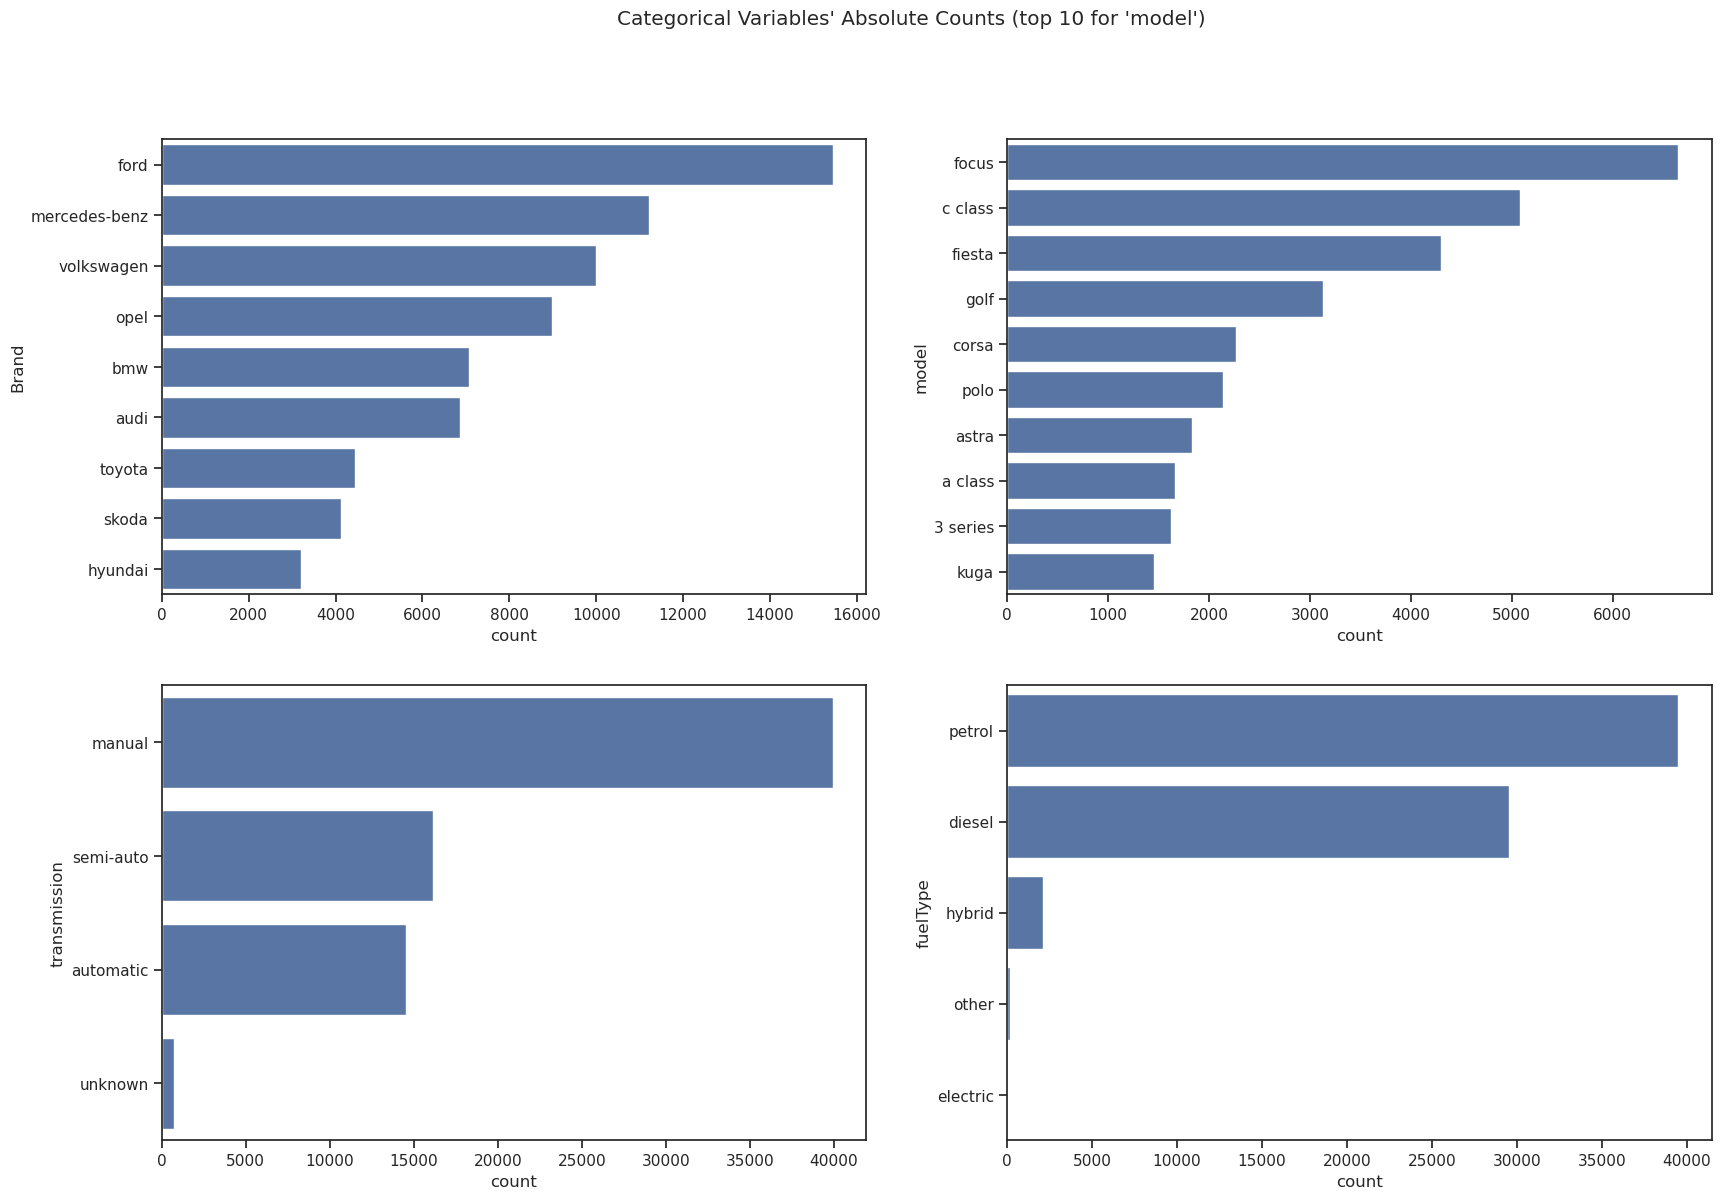

In [55]:
sns.set_style('ticks')

sp_rows = 2
sp_cols = 2

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 13))

#only top 10 for model
for ax, feat in zip(axes.flatten(), non_metric_features):
    sns.countplot(y=feat, data=train, ax=ax, order=train[feat].value_counts().index[:10])

# Layout
# Add a centered title to the figure:
title = "Categorical Variables' Absolute Counts (top 10 for 'model')"

plt.suptitle(title)
plt.show()

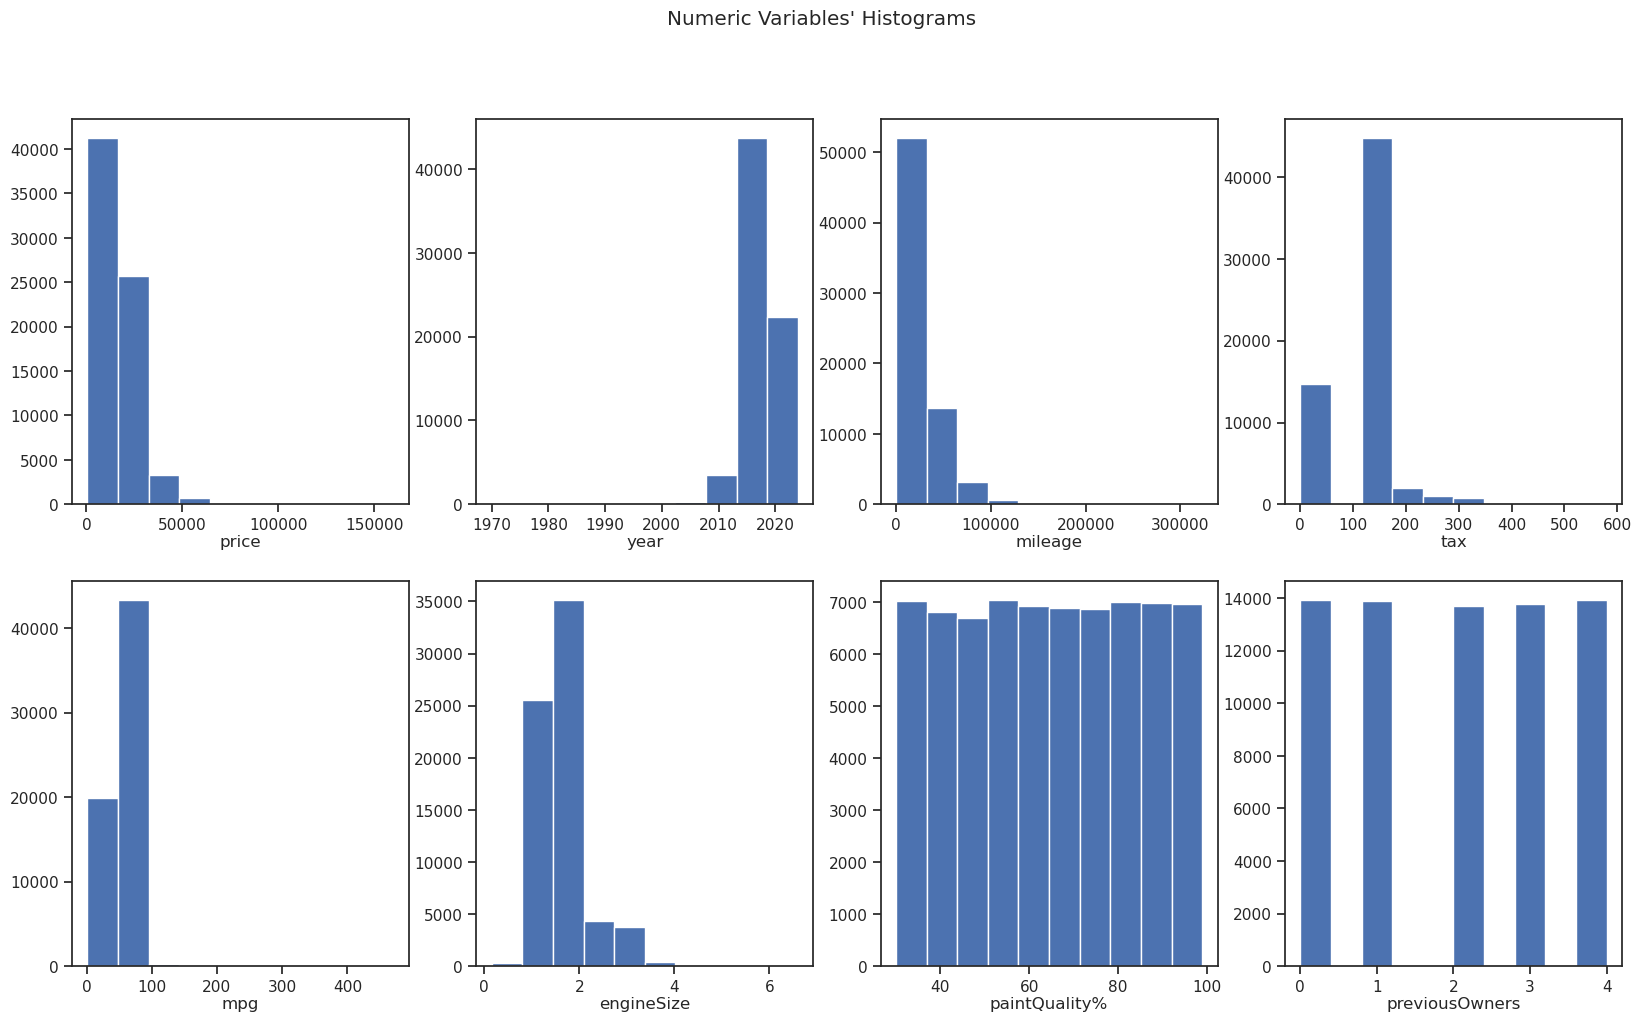

In [56]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set_style('ticks')

sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)
plt.show()

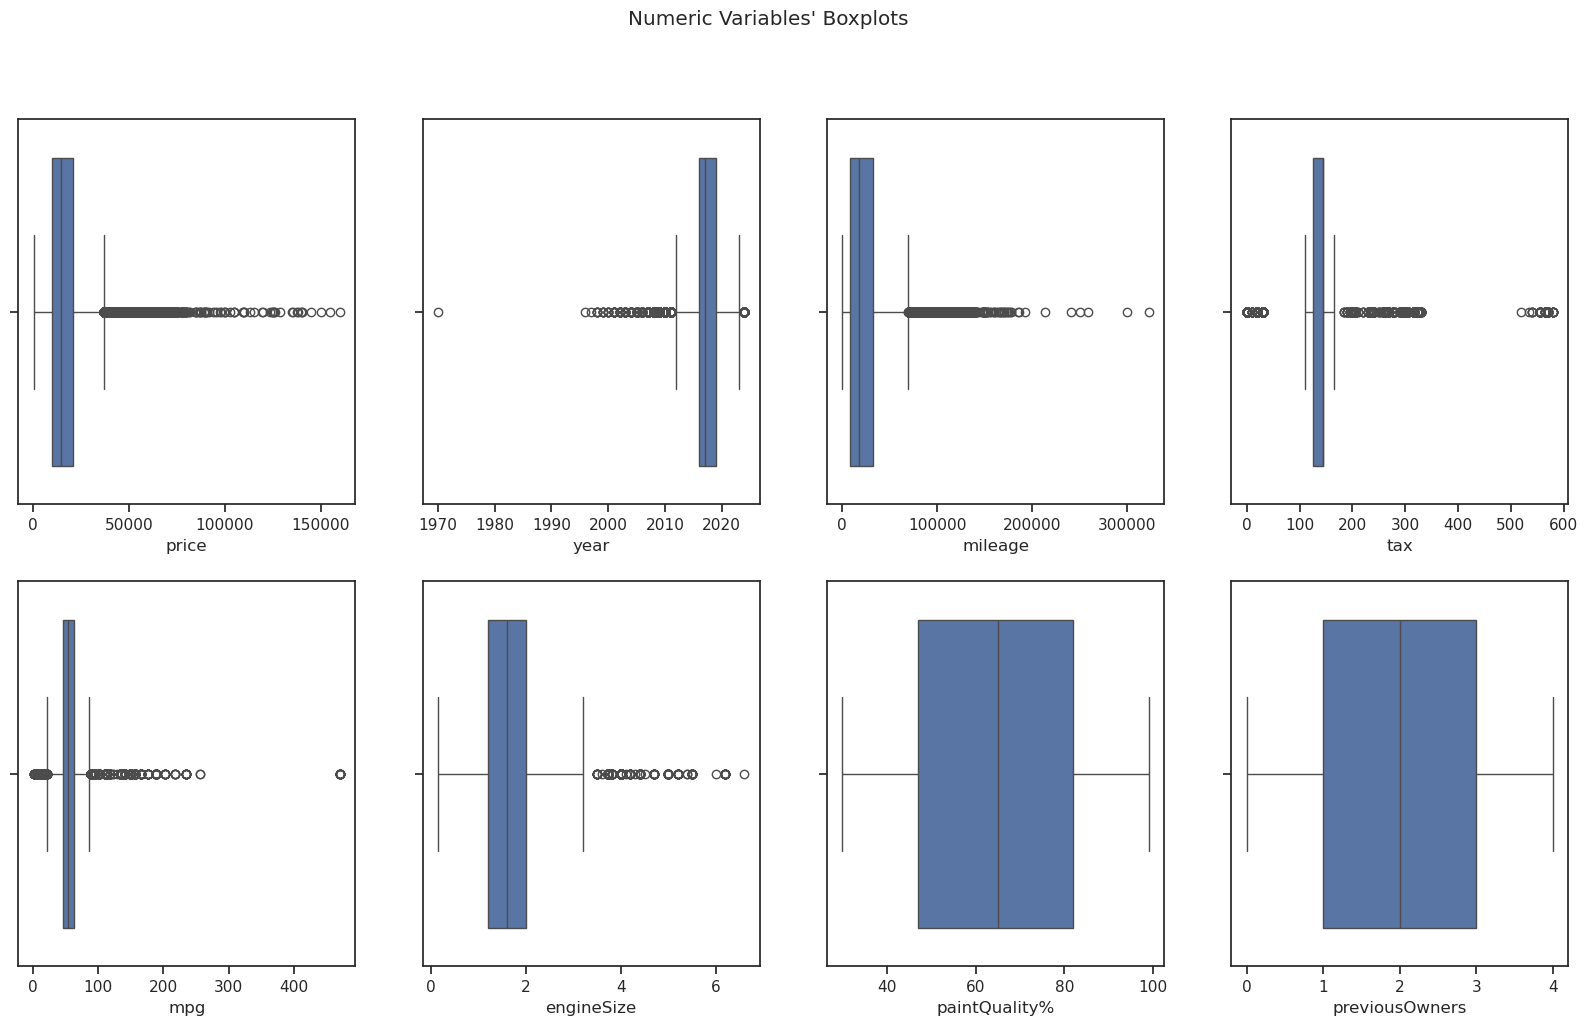

In [57]:
# Plot ALL Numeric Variables' Boxplots in one figure

sns.set_style('ticks')

sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x=train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Boxplots"

plt.suptitle(title)
plt.show()

In [58]:
# One outlier from 1970 - we dont have enough examples from old cars
train.loc[train['year'] < 1995]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
34917,35769,mercedes-benz,m class,1970.0,24999,automatic,14000.0,diesel,305.0,39.2,NaN,44.0,3.0,0.0


In [59]:
# Only bmw - i3 - Whole group of cars
train.loc[train['mpg'] > 400]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
4101,13075,bmw,i3,2015.0,15498,automatic,33931.0,hybrid,0.0,470.8,NaN,31.0,4.0,0.0
5278,12640,bmw,i3,2017.0,19500,automatic,23956.0,other,135.0,470.8,0.600000,53.0,1.0,0.0
6978,12786,bmw,i3,2015.0,17400,automatic,29465.0,electric,0.0,470.8,3.822758,67.0,2.0,0.0
18710,12853,bmw,i3,2017.0,21898,automatic,10839.0,hybrid,0.0,470.8,NaN,31.0,4.0,0.0
21445,12090,bmw,i3,2016.0,19490,automatic,8421.0,hybrid,0.0,470.8,NaN,31.0,4.0,0.0
24975,13378,bmw,i3,2015.0,17481,automatic,9886.0,hybrid,0.0,470.8,NaN,44.0,0.0,0.0
29581,12269,bmw,i3,2017.0,19980,automatic,26965.0,hybrid,140.0,470.8,NaN,81.0,3.0,0.0
33383,10695,bmw,i3,2017.0,21494,automatic,NaN,hybrid,135.0,470.8,NaN,54.0,1.0,0.0
33829,11532,bmw,i3,2016.0,16500,automatic,35446.0,hybrid,0.0,470.8,NaN,59.0,3.0,0.0
36726,9737,bmw,i3,2014.0,14495,automatic,34539.0,hybrid,0.0,470.8,NaN,42.0,0.0,0.0


In [60]:
#not weird
train.loc[train['mileage'] > 200000]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
4840,48382,skoda,octavia,2010.0,1190,manual,300000.0,diesel,125.0,57.6,1.9,79.0,2.0,0.0
6658,4692,audi,a6,2008.0,2490,manual,323000.0,diesel,200.0,44.1,2.0,74.0,1.0,0.0
33429,9978,bmw,x5,2012.0,7250,automatic,214000.0,diesel,300.0,37.7,3.0,68.0,1.0,0.0
33484,48912,skoda,octavia,NaN,2750,automatic,241565.0,diesel,185.0,47.9,1.9,33.0,4.0,0.0
45843,48042,skoda,octavia,2010.0,1485,manual,250650.0,diesel,125.0,57.6,1.9,62.0,1.0,0.0
55413,45370,mercedes-benz,v class,2010.0,6949,automatic,259000.0,diesel,540.0,30.7,3.0,54.0,1.0,0.0


In [61]:
# seems fine
train.loc[train['tax'] > 400].sample(9)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
53066,35117,mercedes-benz,c class,2013.0,22948,automatic,39000.0,petrol,570.0,23.5,6.2,36.0,1.0,0.0
72862,46607,mercedes-benz,m class,2010.0,7449,automatic,155876.0,diesel,540.0,32.5,3.0,72.0,0.0,0.0
74462,56446,opel,antara,2007.0,2999,automatic,99500.0,diesel,565.0,32.8,2.0,87.0,3.0,0.0
42225,40793,mercedes-benz,m class,2008.0,5990,automatic,110000.0,diesel,555.0,28.8,3.0,56.0,NaN,0.0
64632,39351,mercedes-benz,gle class,2015.0,48400,automatic,13212.0,petrol,570.0,23.7,NaN,80.0,2.0,0.0
21016,2354,audi,r8,2015.0,54945,automatic,23924.0,petrol,570.0,22.8,4.2,86.0,1.0,0.0
66991,36,audi,rs5,2014.0,26995,automatic,49989.0,petrol,555.0,26.4,4.2,99.0,3.0,0.0
46431,40664,mercedes-benz,e class,2015.0,21900,automatic,83079.0,petrol,555.0,28.8,5.5,58.0,1.0,0.0
60483,12393,bmw,5 series,2016.0,30990,automatic,32000.0,petrol,555.0,28.5,4.4,30.0,1.0,0.0


In [62]:
#seems fine
train.loc[train['tax'] < 100].sample(9)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
70161,69521,volkswagen,polo,2016.0,8991,unknown,28309.0,petrol,20.0,60.1,1.000000,76.0,3.0,0.0
12025,64079,opel,corsa,2011.0,6495,manual,45175.0,petrol,30.0,55.4,1.400000,89.0,3.0,0.0
6296,71271,volkswagen,polo,2017.0,9798,manual,15773.0,petrol,20.0,58.9,1.000000,90.0,2.0,NaN
10837,46680,mercedes-benz,e class,2015.0,13750,automatic,41952.0,diesel,30.0,64.2,2.100000,38.0,0.0,0.0
60820,58730,opel,corsa,2015.0,6450,manual,58000.0,diesel,0.0,85.6,2.064119,97.0,3.0,0.0
29633,48293,skoda,fabia,2017.0,9678,manual,18084.0,petrol,20.0,60.1,1.200000,42.0,1.0,0.0
28374,59147,opel,mokka,2012.0,7000,manual,51748.0,diesel,30.0,62.8,1.700000,68.0,0.0,0.0
23765,51103,skoda,octavia,2016.0,6491,manual,112000.0,diesel,0.0,NaN,1.600000,97.0,3.0,0.0
20600,24261,ford,grand tourneo connect,2017.0,14000,manual,20122.0,diesel,30.0,64.2,1.500000,62.0,1.0,NaN


In [63]:
#seems fine
train.loc[train['engineSize'] > 4].sample(9)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
74756,12984,bmw,m5,2015.0,29795,automatic,28500.0,petrol,565.000000,28.5,4.4,89.0,1.0,0.0
9777,10254,bmw,6 series,2017.0,27000,automatic,17942.0,petrol,145.000000,32.1,4.4,40.0,1.0,0.0
21770,45626,mercedes-benz,sl class,2016.0,52990,semi-auto,21681.0,petrol,565.000000,28.0,5.5,71.0,1.0,0.0
59314,46668,mercedes-benz,gle class,2017.0,55995,automatic,7000.0,petrol,145.000000,29.5,5.5,77.0,3.0,0.0
60460,28949,ford,mustang,2019.0,40495,automatic,2000.0,petrol,145.000000,22.1,5.0,58.0,2.0,0.0
58581,35674,mercedes-benz,sl class,2019.0,80650,automatic,221.0,petrol,145.000000,28.0,5.5,51.0,3.0,0.0
31195,40506,mercedes-benz,s class,2015.0,36499,automatic,8051.0,petrol,326.028233,31.7,4.7,60.0,1.0,NaN
5047,46372,mercedes-benz,c class,2013.0,22995,semi-auto,49964.0,petrol,NaN,23.0,6.2,78.0,3.0,0.0
48585,288,audi,rs4,2013.0,26995,semi-auto,28359.0,petrol,565.000000,26.4,4.2,37.0,4.0,0.0


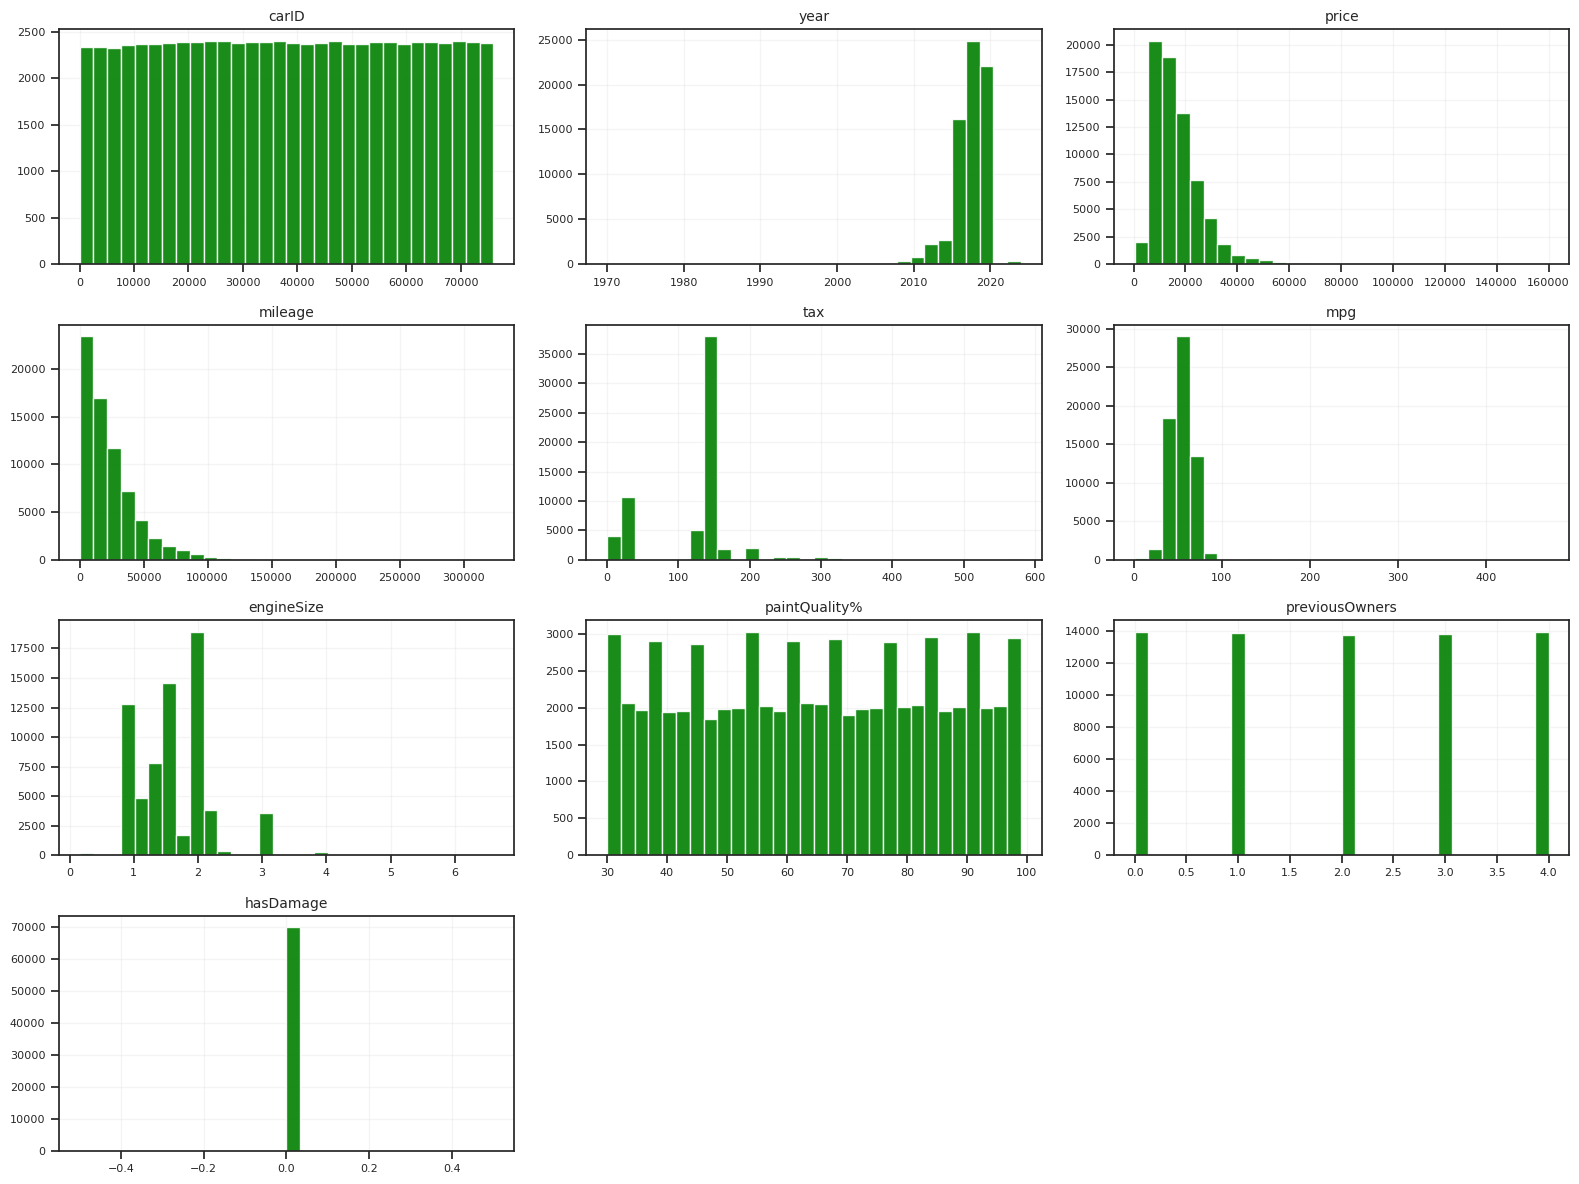

In [64]:
num = train.select_dtypes(include='number')
cols = num.columns.tolist()

n = len(cols)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 3*nrows))
axes = axes.flatten() if n > 1 else [axes]

for ax, col in zip(axes, cols):
    ax.hist(num[col].dropna(), bins=30, color='green', edgecolor='white', alpha=0.9)
    ax.set_title(col, fontsize=10)
    ax.tick_params(labelsize=8)
    ax.grid(alpha=0.2)

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

### 2.2.2 Bivariate Analysis

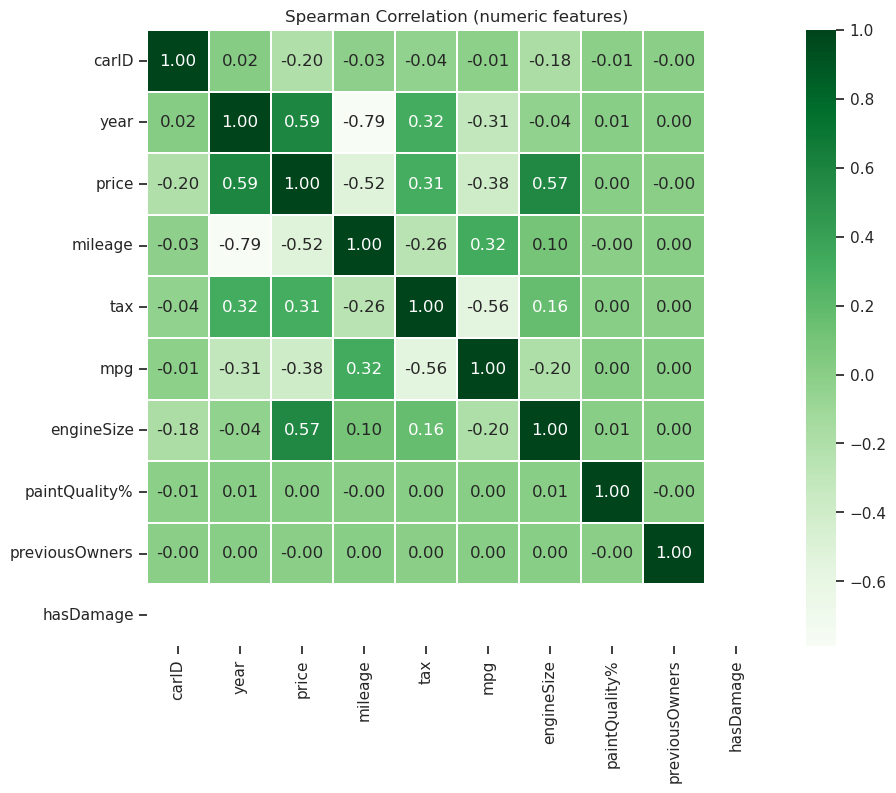

In [65]:
# Keep all rows; .corr handles NaNs pairwise
test = train

# Select numerical columns for correlation analysis
data = test.select_dtypes(include=['number'])

# Since our numeric features are not normally distributed and some are ordinal,
# we use the Spearman correlation matrix (Pearson is the default)
correlation_matrix = data.corr(method='spearman')

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens', linewidths=0.1)
plt.title("Spearman Correlation (numeric features)")
plt.show()

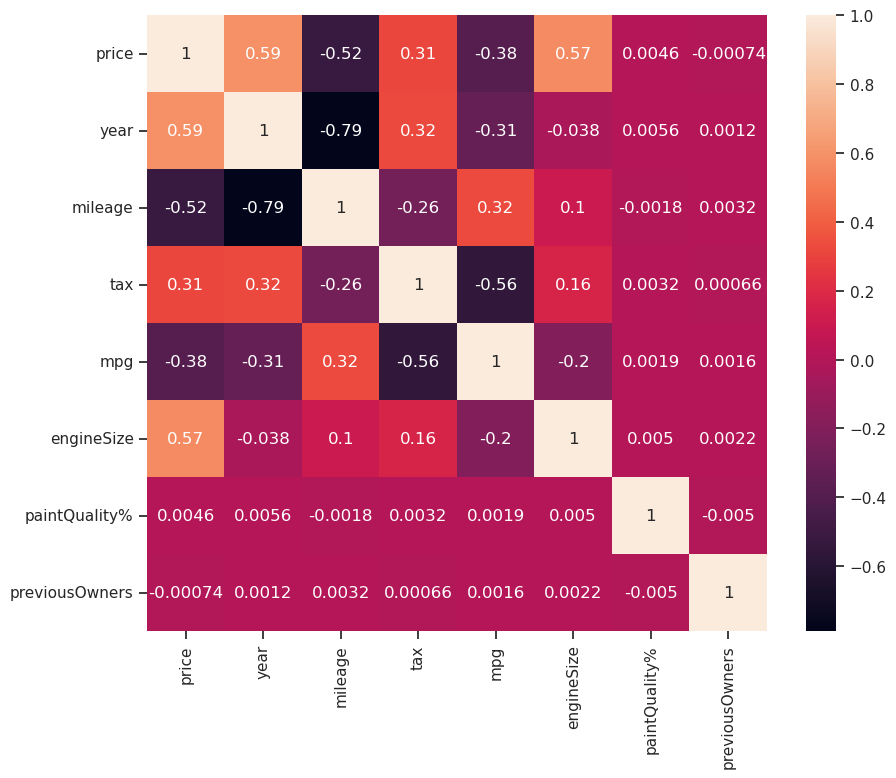

In [66]:
fig = plt.figure(figsize=(10, 8))
threshold = 0.3

corr = train[metric_features].corr(method="spearman")

annot = corr.round(2).astype(str)
annot_masked = annot.where(corr.abs() >= threshold, '') 

sns.heatmap(data=corr,annot= True)

plt.show()

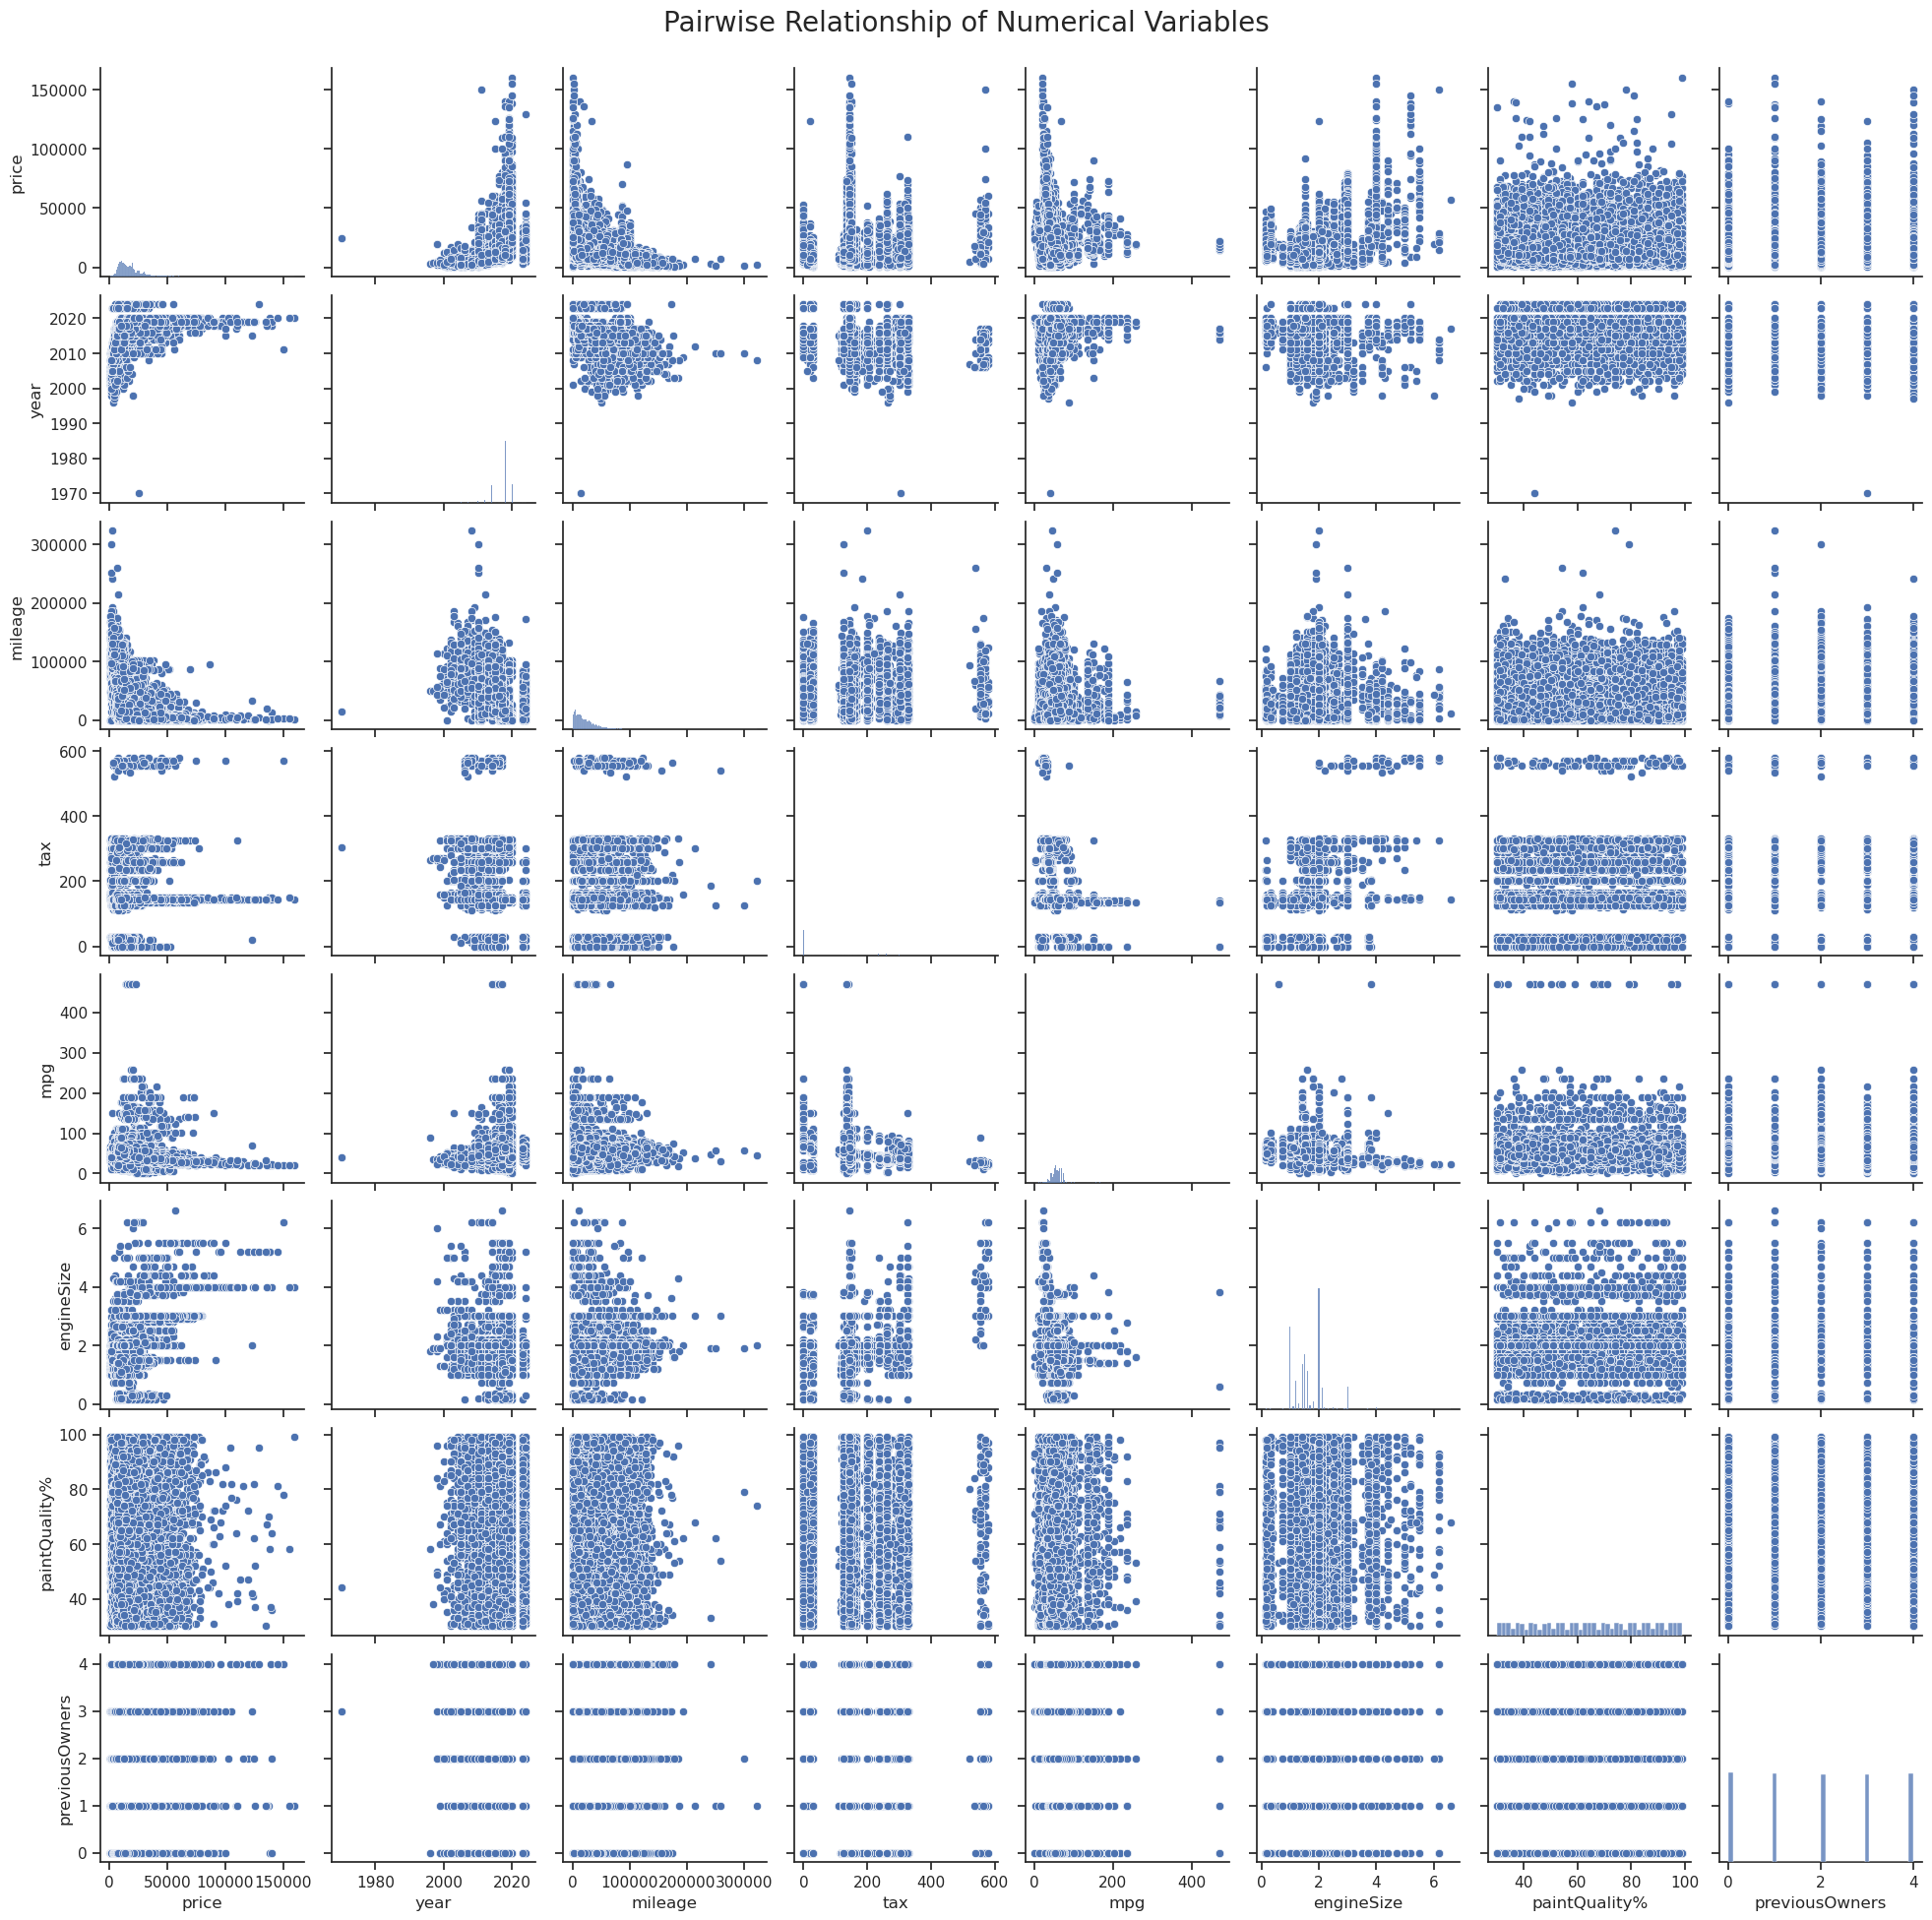

In [67]:
# Pairwise Relationship of Numerical Variables
sns.set_style('ticks')

# Setting pairplot
sns.pairplot(train[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)


plt.show()

# 3. Data cleaning and Preprocessing

## 3.1 Duplicates

## 3.2 Feature Engeneering

### 3.2.1 Data Type Conversions

# Make sure the variable types are correctly identified

# Identifier
id_vars = ["carID"]
# Categorical variables (nominal, not ordered)
cat_vars = [
    "Brand",
    "model",
    "transmission",
    "fuelType"
]
# Ordinal variables (ordered but discrete)
ord_vars = [
    "year",
    "previousOwners"
]
# Continuous numerical variables
cont_vars = [
    "mileage",
    "tax",
    "mpg",
    "engineSize",
    "paintQuality%"
]
# Boolean variables
bool_vars = [
    "hasDamage"
]
# Variable groups in a dictionary
var_types = {
    "identifier": id_vars,
    "categorical": cat_vars,
    "ordinal": ord_vars,
    "continuous": cont_vars,
    "boolean": bool_vars
}
# Display 
for k, v in var_types.items():
    print(f"{k.capitalize():<12}: {v}")

In [80]:
# convert the variable types
for col in var_types['categorical']:
    train[col] = train[col].astype('category')

for col in var_types['ordinal']:
    train[col] = train[col].astype('category')

for col in var_types['continuous']:
    train[col] = train[col].astype('float')

for col in var_types['boolean']:
    train[col] = train[col].astype('bool')

NameError: name 'var_types' is not defined

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71329 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           71329 non-null  int64  
 1   Brand           71329 non-null  object 
 2   model           71329 non-null  object 
 3   year            69929 non-null  float64
 4   price           71329 non-null  int64  
 5   transmission    71329 non-null  object 
 6   mileage         69617 non-null  float64
 7   fuelType        71329 non-null  object 
 8   tax             63511 non-null  float64
 9   mpg             63812 non-null  float64
 10  engineSize      69650 non-null  float64
 11  paintQuality%   69213 non-null  float64
 12  previousOwners  69177 non-null  float64
 13  hasDamage       69871 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 10.2+ MB


### 3.2.2 Encoding

In [82]:
train

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,volkswagen,golf,2016.0,22290,semi-auto,28421.0,petrol,NaN,11.417268,2.0,63.0,4.0,0.0
1,53000,toyota,yaris,2019.0,13790,manual,4589.0,petrol,145.0,47.900000,1.5,50.0,1.0,0.0
2,6366,audi,q2,2019.0,24990,semi-auto,3624.0,petrol,145.0,40.900000,1.5,56.0,4.0,0.0
3,29021,ford,fiesta,2018.0,12500,manual,9102.0,petrol,145.0,65.700000,1.0,50.0,NaN,0.0
4,10062,bmw,2 series,2019.0,22995,manual,1000.0,petrol,145.0,42.800000,1.5,97.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,mercedes-benz,c class,2015.0,13498,manual,14480.0,petrol,125.0,53.300000,2.0,78.0,0.0,0.0
75969,6265,audi,q3,2013.0,12495,semi-auto,52134.0,diesel,200.0,47.900000,2.0,38.0,2.0,0.0
75970,54886,toyota,aygo,2017.0,8399,automatic,11304.0,petrol,145.0,67.000000,1.0,57.0,3.0,0.0
75971,860,audi,q3,2015.0,12990,manual,69072.0,diesel,125.0,60.100000,2.0,74.0,2.0,0.0


In [83]:
train[["Brand", "model", "transmission", "fuelType"]]

,Brand,model,transmission,fuelType
0,volkswagen,golf,semi-auto,petrol
1,toyota,yaris,manual,petrol
2,audi,q2,semi-auto,petrol
3,ford,fiesta,manual,petrol
4,bmw,2 series,manual,petrol
...,...,...,...,...
75968,mercedes-benz,c class,manual,petrol
75969,audi,q3,semi-auto,diesel
75970,toyota,aygo,automatic,petrol
75971,audi,q3,manual,diesel


In [84]:
# --- split target/ID from features ---
y = train['price']
X = train.drop(columns=['price'])

In [85]:
id_col = "carID"  # set ID col name

# keep ID aside (not a feature)
ids = X[id_col] if (id_col in X.columns) else None
if ids is not None:
    X = X.drop(columns=[id_col])

In [86]:
# --- select dtypes ---
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_cols   = X.select_dtypes(include=[np.number]).columns.tolist()

In [87]:
# --- OHE on categoricals ---
ohe = OneHotEncoder(drop="first", sparse_output=False)
encoded_array = ohe.fit_transform(X[categorical_cols]) if categorical_cols else np.empty((len(X), 0))
encoded_cols  = ohe.get_feature_names_out(categorical_cols) if categorical_cols else []

In [88]:
pd.DataFrame(encoded_array, columns=encoded_cols)

,Brand_bmw,Brand_ford,Brand_hyundai,Brand_mercedes-benz,Brand_opel,Brand_skoda,Brand_toyota,Brand_volkswagen,model_2 series,model_200,...,model_z4,model_zafira,model_zafira tourer,transmission_manual,transmission_semi-auto,transmission_unknown,fuelType_electric,fuelType_hybrid,fuelType_other,fuelType_petrol
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71324,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
71325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
71326,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
71327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
# --- combine numeric + encoded categoricals ---
X_enc = pd.concat(
    [
        X[numerical_cols].reset_index(drop=True),
        pd.DataFrame(encoded_array, columns=encoded_cols)
    ],
    axis=1
)

In [90]:
X_enc

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,Brand_bmw,Brand_ford,...,model_z4,model_zafira,model_zafira tourer,transmission_manual,transmission_semi-auto,transmission_unknown,fuelType_electric,fuelType_hybrid,fuelType_other,fuelType_petrol
0,2016.0,28421.0,NaN,11.417268,2.0,63.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2019.0,4589.0,145.0,47.900000,1.5,50.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2019.0,3624.0,145.0,40.900000,1.5,56.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2018.0,9102.0,145.0,65.700000,1.0,50.0,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2019.0,1000.0,145.0,42.800000,1.5,97.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71324,2015.0,14480.0,125.0,53.300000,2.0,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
71325,2013.0,52134.0,200.0,47.900000,2.0,38.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
71326,2017.0,11304.0,145.0,67.000000,1.0,57.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
71327,2015.0,69072.0,125.0,60.100000,2.0,74.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
X_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71329 entries, 0 to 71328
Columns: 214 entries, year to fuelType_petrol
dtypes: float64(214)
memory usage: 116.5 MB


In [92]:
# --- train/test split ---
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X_enc, y, X_enc.index, test_size=0.2, random_state=RSEED)

In [93]:
# --- model ---
model = LinearRegression().fit(X_train, y_train)
pred = model.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [94]:
train.columns

Index(['carID', 'Brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'hasDamage'],
      dtype='object')

In [96]:
data = train[['carID', 'Brand', 'model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize']].copy()

target = "price"
id_col = "carID"  # or None

y = data[target]
X = data.drop(columns=[target, id_col]) if id_col in data.columns else data.drop(columns=[target])

categorical_cols = X.select_dtypes(include=["object","category"]).columns.tolist()
numerical_cols   = X.select_dtypes(include=[np.number]).columns.tolist()

#num_proc = IterativeImputer(random_state=RSEED)  # multiple imputation

num_proc = Pipeline([
    ("imp", IterativeImputer(random_state=RSEED)),
    ("scaler", StandardScaler())
])

cat_proc = Pipeline(steps=[
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_proc, numerical_cols),
        ("cat", cat_proc, categorical_cols),
    ],
    remainder="drop"
)

In [97]:
model = Pipeline(steps=[("prep", preprocess), ("lr", LinearRegression())])

#model = Pipeline([
#    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
#    ("lr", LinearRegression())
#])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Fit & predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [99]:
# Metrics
r2   = r2_score(y_test, y_pred)
#rmse = mean_squared_error(y_test, y_pred, squared=False)
mae  = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAPE (ignore zero targets to avoid div-by-zero)
mask = y_test != 0
mape = mean_absolute_percentage_error(y_test[mask], y_pred[mask])

print(f"R2: {r2:.3f} | RMSE: {rmse:,.2f} | MAE: {mae:,.2f} | MAPE: {mape*100:.2f}%") # 

R2: 0.838 | RMSE: 3,838.58 | MAE: 2,429.06 | MAPE: 18.53%


In [102]:
#x1 = pd.DataFrame([sample_dict]).drop(columns=[id_col], errors="ignore")
x1 = data.drop(columns=[id_col], errors="ignore")
y_hat = model.predict(x1)[0]
y_hat

np.float64(20772.81639555066)

In [103]:
data['price'][0]

np.int64(22290)